In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
data=sns.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
for i in data.columns:
    print(data[i].isnull().sum(),i)

0 survived
0 pclass
0 sex
177 age
0 sibsp
0 parch
0 fare
2 embarked
0 class
0 who
0 adult_male
688 deck
2 embark_town
0 alive
0 alone


In [5]:
data.shape

(891, 15)

In [6]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [7]:
survivedData=data[data["survived"]==1]
survivedData.shape

(342, 15)

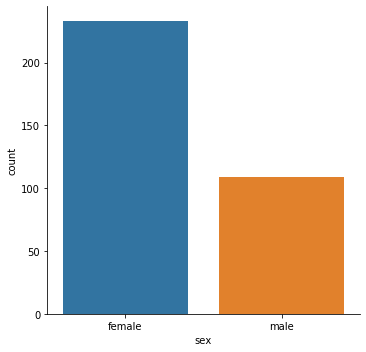

In [8]:
sns.catplot(x="sex", kind="count", data=survivedData)

In [53]:
survivedData['sex'].value_counts()

female    233
male      109
Name: sex, dtype: int64

Males are greater in number compared to females

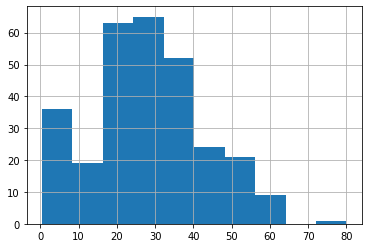

In [9]:
survivedData['age'].hist()

Of the 342 people survived maimum number of the survivors are from the age group of 20 to 40 followed by 0 to 10

In [10]:
survivedData.describe()

,survived,pclass,age,sibsp,parch,fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


Of the people who survived the middle 50 % of the survivors are of the age group 19 to 36 which confirms our earlier analysis through histogram

In [11]:
x=data[data['age']>=20]
print("Total number of people who survived",x[x['age']<=38]['age'].shape)
y=survivedData[survivedData['age']>=20]
print("people of age 20 to 38 who survied",y[y['age']<=38].shape)

Total number of people who survived (373,)
people of age 20 to 38 who survied (145, 15)


People of age group 20 to 38 make 50 % of the total 891 people on board of ships of which  

C:\Users\venka\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


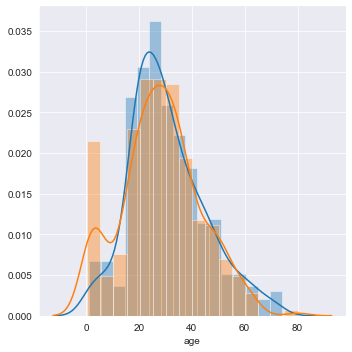

In [12]:
sns.set_style('darkgrid')
sns.FacetGrid(data,hue='survived',size=5)\
    .map(sns.distplot,'age')

In [13]:
sns.distplot(data['age'],bins=40,hu)

SyntaxError: positional argument follows keyword argument (<ipython-input-13-c9da25a27df8>, line 1)

In [14]:
print(data[data['age']<10]['age'].shape)
print(survivedData[survivedData['age']<10]['age'].shape)

(62,)
(38,)


In [15]:
#print(data[data['age']>=20 and data['age']<=38]['age'].shape)
#print(survivedData[survivedData['age']<10]['age'].shape)

In [16]:
data.shape

(891, 15)

In [17]:
x=data[data['age']>=20]
print(x[x['age']<=38].shape)
y=survivedData[survivedData['age']>=20]
print(y[y['age']<=38].shape)

(373, 15)
(145, 15)


In [18]:
y=survivedData[survivedData['age']>=20]
print(y[y['age']<=38].shape)

(145, 15)


## Problem 2

In [19]:
autoData=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",delim_whitespace=True,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'],na_values=['?'])

In [20]:
autoData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [21]:
autoData['horsepower'].isna().value_counts()

False    392
True       6
Name: horsepower, dtype: int64

In [22]:
autoData.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [23]:
autoData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
print("The VARIANCE  before applying imputing is {0}".format(autoData['horsepower'].var()))

The VARIANCE  before applying imputing is 1481.5693929745862


In [25]:
df1=autoData.copy()
simpleImputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df1['horsepower']=simpleImputer.fit_transform(df1[['horsepower']])
print("The VARIANCE after MEAN imputing is {0}".format(df1['horsepower'].var()))

The VARIANCE after MEAN imputing is 1459.1779160026776


In [26]:
df2=autoData.copy()
simpleImputer=SimpleImputer(missing_values=np.nan,strategy='median')
df2['horsepower']=simpleImputer.fit_transform(df2[['horsepower']])
print("The VARIANCE after MEDIAN imputing is {0}".format(df2['horsepower'].var()))

The VARIANCE after MEDIAN imputing is 1460.96905180816


In [28]:
df3=autoData.copy()
simpleImputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df3['horsepower']=simpleImputer.fit_transform(df3[['horsepower']])
print("The VARIANCE after MODE imputing is {0}".format(df3['horsepower'].var()))

The VARIANCE after MODE imputing is 1490.0361252104324


Mean imputing results in lowest variance as it repalces the value with the mena so the distribution of data doesnot change significantly

Theother strategy is to drop the missing values and building a model to predict the missing values by giving them as query points

In [29]:
df4=autoData.copy()
df4.dropna(inplace=True)
print(df4.shape)
print("The VARIANCE after MODE imputing is {0}".format(df4['horsepower'].var()))

(392, 9)
The VARIANCE after MODE imputing is 1481.5693929745862


### Problem 3

In [35]:
irisData=sns.load_dataset('iris')

In [36]:
type(irisData)

pandas.core.frame.DataFrame

In [37]:
irisData.shape

(150, 5)

In [38]:
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
irisData.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

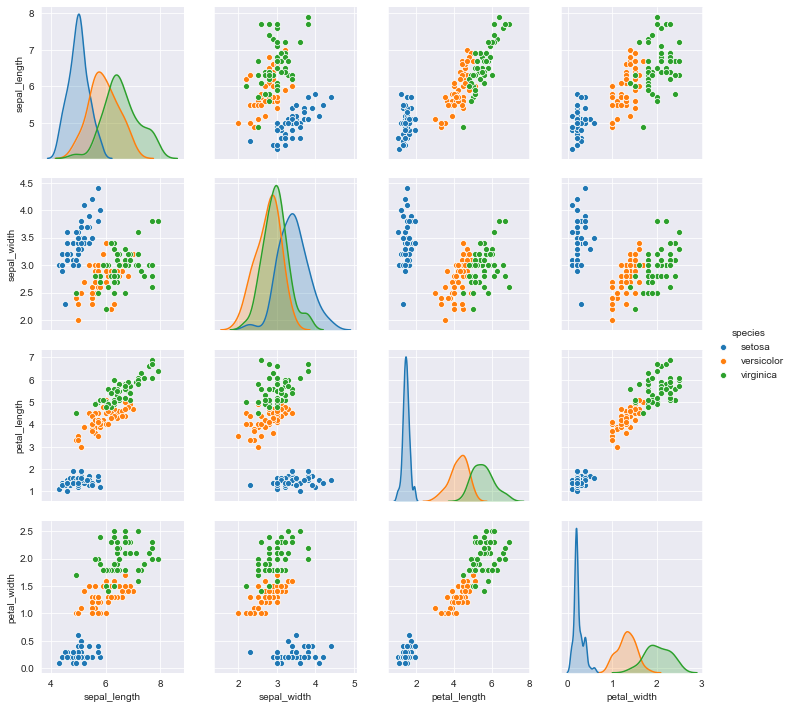

In [40]:
sns.pairplot(data=irisData,hue='species')
plt.show()

In [41]:
pca=PCA(n_components=3)
pca.fit_transform(irisData.iloc[:,:-1])
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261]


In [42]:
allVariance=list()
for column in range(len(irisData.columns)-1):
    allVariance.append(irisData.iloc[:,column].var())
    print("Variance of the {0} is {1}".format(irisData.columns[column],irisData.iloc[:,column].var()))
print("Total Variance is {0}".format(sum(allVariance)))

Variance of the sepal_length is 0.6856935123042505
Variance of the sepal_width is 0.1899794183445188
Variance of the petal_length is 3.1162778523489942
Variance of the petal_width is 0.5810062639821029
Total Variance is 4.572957046979867


In [43]:
for column in range(len(allVariance)):
    print("percentage of variance expalined by FEATURE {0} is {1}".format(irisData.columns[column],allVariance[column]/sum(allVariance)))

percentage of variance expalined by FEATURE sepal_length is 0.14994532099467353
percentage of variance expalined by FEATURE sepal_width is 0.04154410732328823
percentage of variance expalined by FEATURE petal_length is 0.681457931997653
percentage of variance expalined by FEATURE petal_width is 0.12705263968438513


From the features the petal_length has maximum variance followed by petal_width.so these two are the important features to classify the Irsis flowers this can be seen through the pair plot

In [44]:
for i in range(len(pca.explained_variance_ratio_)):
    print("percentage variance expalined by principal component {0} is {1}".format(i+1,pca.explained_variance_ratio_[i]) )

percentage variance expalined by principal component 1 is 0.9246187232017271
percentage variance expalined by principal component 2 is 0.053066483117067825
percentage variance expalined by principal component 3 is 0.01710260980792976


The Principal component 1 has maximum variance i.e. 92.4% followed by principal component 2 i.e. 5.3% and the principlal component 3 has least variance and explains 1% of the total data.

The max vauriance expalined by the features is 68.14 % by the Petal_length where as the Principal component 1 expalins 92.4%.So from this we can say that the Principal component 1 explains more about the data than the petal_length.

In [45]:
irisData.columns[2]

'petal_length'

In [ ]:
for (i, variance )in enumerate(pca.explained_variance_ratio_):
    print(i,variance)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca.explained_variance_ratio_[1]

In [ ]:
for i in range(len(pca.explained_variance_ratio_)):
    print("percentage variance expalined by principal component {0} is {1}".format(i+1,pca.explained_variance_ratio_[i]) )

### Problem 4

ValueError: x and y must be the same size

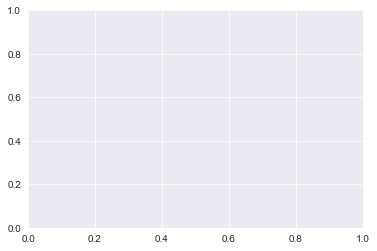

In [46]:
plt.scatter(x=irisData['sepal_length'],y=pca)

In [47]:
pcaDataPoints=pd.DataFrame(pca.fit_transform(irisData.iloc[:,:-1]))

In [48]:
pcaDataPoints[0]

0     -2.684126
1     -2.714142
2     -2.888991
3     -2.745343
4     -2.728717
         ...   
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: 0, Length: 150, dtype: float64

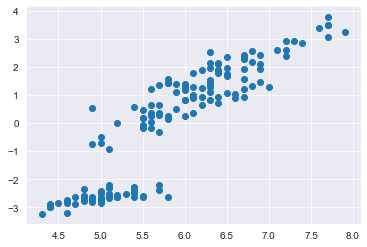

In [49]:
plt.scatter(x=irisData['sepal_length'],y=pcaDataPoints[0])

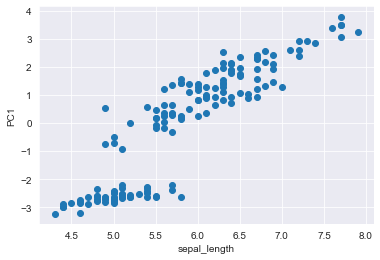

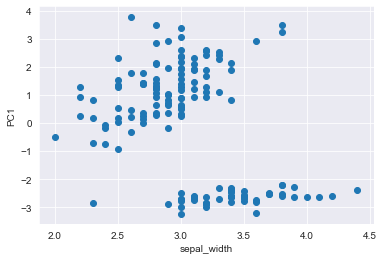

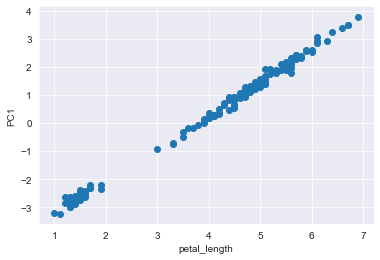

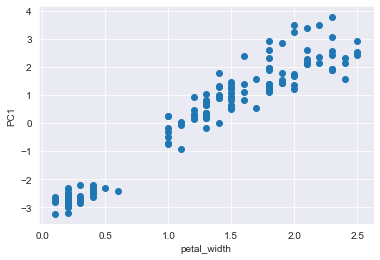

In [50]:
for column in range(len(irisData.columns)-1):
    plt.scatter(x=irisData.iloc[:,column],y=pcaDataPoints[0])
    plt.xlabel(irisData.columns[column])
    plt.ylabel("PC1")
    plt.show()

In [51]:
for column in range(len(irisData.columns)-1):
    print("The corelation between {0} and Principal Component1 is {1}".format(irisData.columns[column],np.corrcoef(irisData.iloc[:,column],pcaDataPoints[0])[0][1]))

The corelation between sepal_length and Principal Component1 is 0.8974017619582983
The corelation between sepal_width and Principal Component1 is -0.3987484724557002
The corelation between petal_length and Principal Component1 is 0.9978739422413107
The corelation between petal_width and Principal Component1 is 0.9665475167033069


We can see the petal_length has highest corelation coefficient followed by petal_width,sepal_length,sepal_width.<br>
We can observe that the sepal width has inverse relation.<br>
The above scattter plot show the same i.e. higher the corelation closer the points 

## Problem 5

In [ ]:
pca1=PCA(n_components=4)
pca1.fit_transform(irisData.iloc[:,:-1])
pcaDataPoints1=pd.DataFrame(pca1.fit_transform(irisData.iloc[:,:-1]))
pca1.components_

In [ ]:
for column in range(len(allVariance)):
    print("percentage of variance expalined by FEATURE {0} is {1}".format(irisData.columns[column],allVariance[column]/sum(allVariance)))

In [ ]:
pcaDataPoints

In [ ]:
allVariancePCA=list()
for column in range(len(pcaDataPoints1.columns)-1):
    allVariancePCA.append(pcaDataPoints1.iloc[:,column].var())
    print("Variance of the {0} is {1}".format(pcaDataPoints1.columns[column],pcaDataPoints1.iloc[:,column].var()))
print("Total Variance is {0}".format(sum(allVariancePCA)))

In [ ]:
allVariance=list()
for column in range(len(irisData.columns)-1):
    allVariance.append(irisData.iloc[:,column].var())
    print("Variance of the {0} is {1}".format(irisData.columns[column],irisData.iloc[:,column].var()))
print("Total Variance is {0}".format(sum(allVariance)))

In [ ]:
for i in range(len(pca1.explained_variance_ratio_)):
    print("percentage variance expalined by principal component {0} is {1}".format(i+1,pca1.explained_variance_ratio_[i]) )

If we use 4 principal components it explains almost same amount of variance as that of the original features.<br>
To explain 95 % of the variance of data we need only Principal component 1 & Principal component 2.<br>
As Principal component 1 & Principal component 2 expalins 0.9776 i.e. 97.76% of the data.<br>
This implies we only need two principal components.<br>

In [ ]:
points1=[[1,1,1,1]]
points2=[[2,2,2,2]]
array1=np.array(points1[0])
array2=np.array(points2[0])
print(np.linalg.norm(array1-array2))
print(np.corrcoef(array1,array2))
print(scipy.spatial.distance.cosine(array1,array2))

In [ ]:
points1=[[1,1,1,1],[0,1,0,1],[0,-1,0,1],[1,1,0,1,0,1],[2,-1,0,2,0,-3]]
points2=[[2,2,2,2],[1,0,1,0],[1,0,-1,0],[1,1,1,0,0,1],[-1,1,-1,0,0,-1]]
#vector_1 = [1,1,1,1]
#vector_2 = [2,2,2,2]
for i in range(len(points1)):
    unitVector1= points1[i] / np.linalg.norm(points1[i])
    unitVector2 = points2[i] / np.linalg.norm(points2[i])
    dotPrduct=np.dot(unitVector1, unitVector2)
    x=np.arccos(dotPrduct)
    print(math.cos(x))

In [ ]:
scipy.spatial.distance.jaccard([0,1,0,1],[1,0,1,0])

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score([0,1,0,1],[1,0,1,0])